# 결정트리

분류, 회귀문제 모두 사용가능. 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습함.

In [5]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [10]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

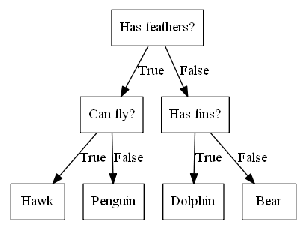

In [11]:
mglearn.plots.plot_animal_tree()

트리를 훈련시킬 때 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 과대적합을 일으킨다. 과대적합을 막는 전략으로 트리 생성을 일찍 중단하는 전략인 사전가지치기를 사용함.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("train set accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test,y_test)))

train set accuracy: 1.000
test set accuracy: 0.937


In [19]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

print("train set accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test,y_test)))

train set accuracy: 0.988
test set accuracy: 0.951


In [20]:
from sklearn.tree import export_graphviz # tree 이미지파일을 만들어 .dot 형태의 파일을 저장.
export_graphviz(tree, out_file = "tree.dot",class_names=["악성","양성"],feature_names=cancer.feature_names,impurity=False,filled=True)

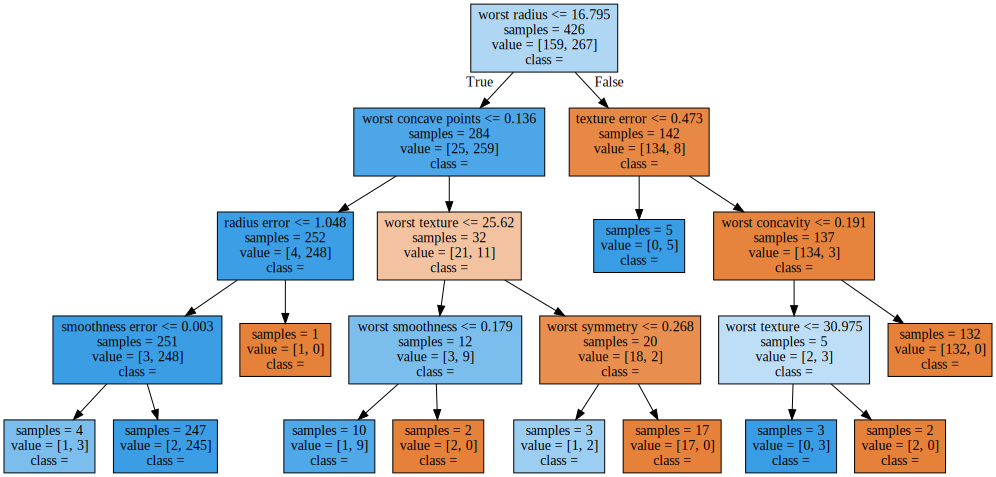

In [29]:
import graphviz # 저장되어있는 .dot 형태의 파일을 읽어와 이미지를 띄워주는 코드

with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [35]:
print("Importances of feature: \n", tree.feature_importances_)

Importances of feature: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


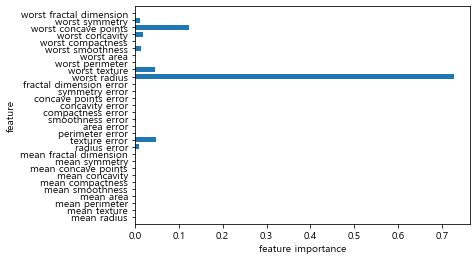

In [38]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

첫 번째 노드에서 사용한 변수인 "worst radius" 가 가장 중요한 특성으로 나타난다. 변수 중요도가 낮다고 해서 그 변수가 유용하지 않다는 뜻은 아님. 단지 트리가 그 변수를 선택하지않았음. 또는 다른 특성이 동일한 정보를 지니고 있어서일 수 도 있음.

Feature importances: [0. 1.]


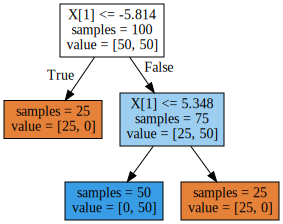

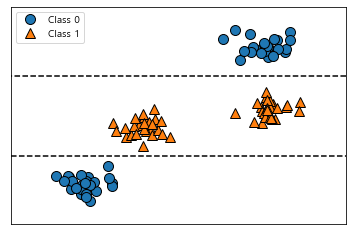

In [39]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

결정 트리를 가지고 분류외에 회귀 문제에 적용시킬 수 있다. DecisionTreeRegressor로 회귀 결정 트리를 사용가능. 하지만 회귀 결정 트리는 특별한 속성을 지님. 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.

Text(0, 0.5, 'Price ($/Mbyte)')

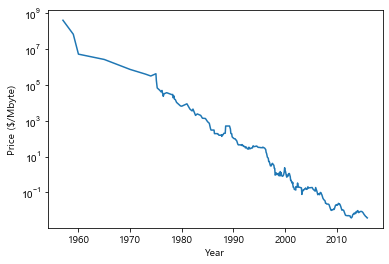

In [42]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듦.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date>=2000]

# 가격 예측을 위해 날짜 특성만을 이용.
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

# 예측은 전체 기간에 대해서 수행.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


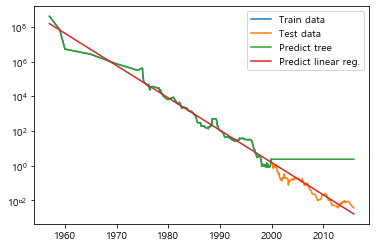

In [49]:
plt.semilogy(data_train.date, data_train.price, label="Train data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Predict tree")
plt.semilogy(ram_prices.date, price_lr, label="Predict linear reg.")
plt.legend()

선형 회귀 모델과 결정 트리 모델은 확연한 차이를 보인다. 선형 모델은 직선으로 데이터를 근사하였고 2000년 이후 데이터에 대해 꽤 정확히 예측함. 반면에 트리 모델은 훈련 데이터를 완벽하게 예측하지만 훈련데이터 범위 밖의 새로운 데이터를 예측할 수 없다. 이러한 성질이 트리 기반 모델의 공통된 단점.

결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 가전 가지치기 매개변수이다. 보통은 사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분.



결정트리가 다른 알고리즘보다 나은 점은 두가지. 첫째, 만들어진 모델을 쉽게 시각화 할 수 있어서 비전문가도 이해하기 쉬움. 그리고 데이터의 스케일에 구애받지 않음. 각 특성이 개별적으로 처리되어 데이터를 분할 하는데 데이터 스케일의 영향을 받지 않으므로 결정트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없음. 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동함.

결정트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지않음. -> 앙상블 방법이 대안!